<p style="font-family: Arial; font-size:3.75em; font-style:bold"><br>
Absenteeism time in hours</p><br>

# Data Exploration 

This dataset consists of **740 observations** and **21 features** with:
*  **8 Categorical features**: Reason for absence,Month of Absence, Day of the week, Seasons, Disciplinary failure,Education,Social drinker and Social smoker 

*  **13 numerical features**: ID, Transportation Expense , Distance from Residence to Work,Service time, Age , Work load , Hit target , Son, Pet, Weight, Height, Body mass index and Absenteeism time in hours 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
%matplotlib inline

In [3]:
absent=pd.read_csv('./Absenteeism_at_work.csv',sep=',')
print (type(absent))
absent.head()

<class 'pandas.core.frame.DataFrame'>


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


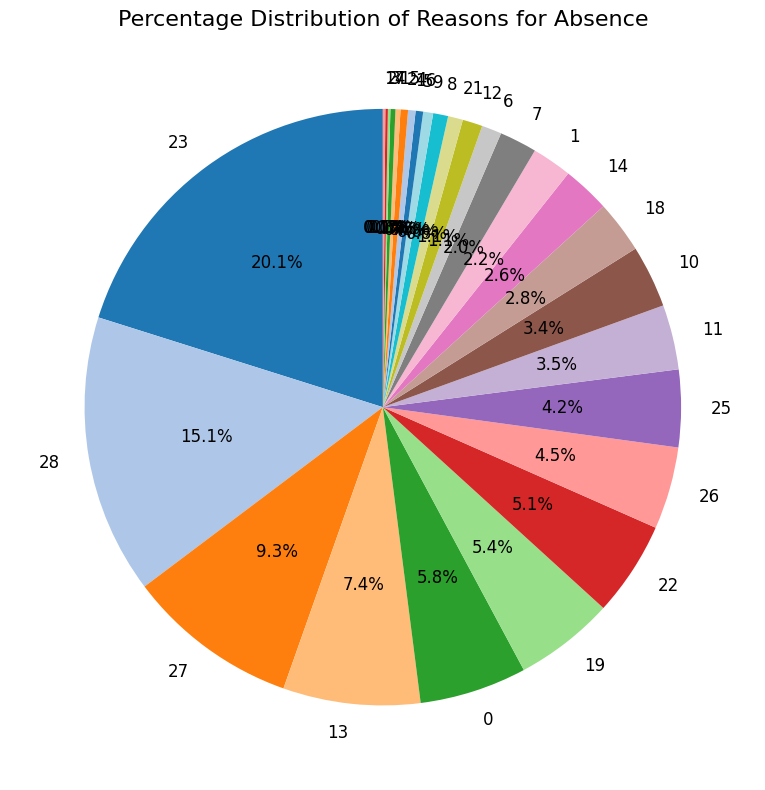

In [4]:
# Calculate percentage distribution of reasons for absence
reason_counts = absent['Reason for absence'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    reason_counts, 
    labels=reason_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab20.colors,  # Use a colormap for diverse colors
    textprops={'fontsize': 12}  # Font size for better readability
)

# Add a title
plt.title('Percentage Distribution of Reasons for Absence', fontsize=16)
plt.tight_layout()
plt.show()


In [5]:
%pip install plotly
import plotly.express as px


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Prepare the data for the sunburst chart
sunburst_data = absent[['Reason for absence', 'Seasons']].copy()
sunburst_data['Count'] = 1

# Create the sunburst chart
fig = px.sunburst(sunburst_data, path=['Seasons', 'Reason for absence'], values='Count',
                  title='Reasons for Absence by Season', color='Seasons',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(textinfo='label+percent entry')
fig.show()

### Visualize Absenteeism time distribution by Reasons

In [7]:
fig = px.box(absent, x='Reason for absence', y='Absenteeism time in hours',
             title="Absenteeism Time by Reason for Absence", color='Seasons')
fig.show()


# Pre Processing

In order to build a good model, we need to have some understanding of the dataset using the Exploratory Data Analysis Process (EDA). For the first step, we will be looking at any necessary data cleaning.

In [8]:
#changing a float 64 to int64
absent['Work load Average/day ']=absent['Work load Average/day '].astype('str')
absent['Work load Average/day ']=absent['Work load Average/day '].str.replace(',', '')
absent['Work load Average/day ']=pd.to_numeric(absent['Work load Average/day '], errors='coerce')


In [9]:
absent.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

In [10]:
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


* The maximum value of Absenteeism time in hours  is 9 standard deviations away from the mean!
* The minimum values for Reason for absence and Month of absence are zero! These are considered unexpected values since 0 Month does not make sense.
* The ID column has 36 for the maximum value meaning that all these 740 observations are split amongst 36 workers. This means that all these rows are repeated observations over time among 36 people. 

A closer look of **the Absenteeism time in hours** and **Reason for absence** columns reveals that all 0's in both Absenteeism time in hours,Month of absence and Reason for absence columns correspond to Absenteeism time in hours=0.

In [11]:
allabsents=absent[absent['Absenteeism time in hours']!=0]

In [12]:
allabsents

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,10,22,7,4,1,361,52,3,28,264604,...,0,1,1,1,0,4,80,172,27,8
733,28,22,7,4,1,225,26,9,28,264604,...,0,1,1,0,0,2,69,169,24,8
734,13,13,7,2,1,369,17,12,31,264604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8


In [13]:
disciplinary_values = allabsents['Disciplinary failure'].value_counts()
disciplinary_values

0    696
Name: Disciplinary failure, dtype: int64

Doing so also takes out all the **Disciplinary failure==1** leaving us with only Disciplinary failure==0. This means that this feature is no longer needed for the analysis.

The rest of the analysis will be looking at the non zero values of Absenteeism with a new dataset called **allabsents**

In [14]:
allabsents=allabsents.drop(['Disciplinary failure'],axis=1)
len(allabsents.ID.unique())

33

Since there are 33 ID's, I wanted to put together a dataframe where all of them

In [15]:
# Extract unique IDs and sort them
unique_ids = sorted(allabsents['ID'].unique())

# One-hot encode categorical features
reasons = pd.get_dummies(allabsents['Reason for absence'], prefix='Reason')
months = pd.get_dummies(allabsents['Month of absence'], prefix='Month')
days = pd.get_dummies(allabsents['Day of the week'], prefix='day')
seasons = pd.get_dummies(allabsents['Seasons'], prefix='Season')

# Concatenate one-hot encoded features with necessary columns
all_features = pd.concat([allabsents[['ID', 'Absenteeism time in hours']], reasons, months, days, seasons], axis=1)

# Function to aggregate one-hot encoded columns by ID
def aggregate_by_id(df, id_column, feature_columns):
    return df.groupby(id_column)[feature_columns].sum()

# Aggregate features
reason_aggregates = aggregate_by_id(all_features, 'ID', reasons.columns)
month_aggregates = aggregate_by_id(all_features, 'ID', months.columns)
day_aggregates = aggregate_by_id(all_features, 'ID', days.columns)
season_aggregates = aggregate_by_id(all_features, 'ID', seasons.columns)

# Combine aggregated data with other metrics
summary = (
    allabsents.groupby('ID')
    .agg({
        'Absenteeism time in hours': 'sum',
        'Hit target': 'mean',
        'Work load Average/day ': 'mean',
        'Age': 'mean',
        'Transportation expense': 'mean',
        'Service time': 'mean',
        'Height': 'mean',
        'Body mass index': 'mean',
        'Weight': 'mean',
        'Social drinker': 'mean',
        'Social smoker': 'mean',
        'Education': 'mean',
        'Pet': 'mean',
        'Distance from Residence to Work': 'mean',
    })
)

# Combine all aggregated data into a single DataFrame
final_data = pd.concat([summary, reason_aggregates, month_aggregates, day_aggregates, season_aggregates], axis=1)

# Display the first 5 rows of selected columns
selected_columns = [
    'Absenteeism time in hours', 'Hit target', 'Work load Average/day ', 'Age',
    'Transportation expense', 'Service time', 'Height', 'Body mass index', 'Weight',
    'Social drinker', 'Social smoker', 'Distance from Residence to Work', 'Reason_1', 'Reason_3', 'Reason_4'
]
final_data[selected_columns].head()


,Absenteeism time in hours,Hit target,Work load Average/day,Age,Transportation expense,Service time,Height,Body mass index,Weight,Social drinker,Social smoker,Distance from Residence to Work,Reason_1,Reason_3,Reason_4
ID,,,,,,,,,,,,,,,
1,121,95.045455,263735.727273,37.0,235.0,14.0,172.0,29.0,88.0,0.0,0.0,11.0,1,0,0
2,25,92.000000,212010.250000,48.0,235.0,12.0,163.0,33.0,88.0,0.0,1.0,29.0,0,0,0
3,482,95.071429,262248.437500,38.0,179.0,18.0,170.0,31.0,89.0,1.0,0.0,51.0,0,0,0
5,104,93.428571,262812.500000,43.0,235.0,13.0,167.0,38.0,106.0,1.0,0.0,20.0,0,0,0
6,72,94.875000,274829.000000,33.0,189.0,13.0,167.0,25.0,69.0,0.0,0.0,29.0,0,0,0


In [16]:
final_data.columns

Index(['Absenteeism time in hours', 'Hit target', 'Work load Average/day ',
       'Age', 'Transportation expense', 'Service time', 'Height',
       'Body mass index', 'Weight', 'Social drinker', 'Social smoker',
       'Education', 'Pet', 'Distance from Residence to Work', 'Reason_1',
       'Reason_2', 'Reason_3', 'Reason_4', 'Reason_5', 'Reason_6', 'Reason_7',
       'Reason_8', 'Reason_9', 'Reason_10', 'Reason_11', 'Reason_12',
       'Reason_13', 'Reason_14', 'Reason_15', 'Reason_16', 'Reason_17',
       'Reason_18', 'Reason_19', 'Reason_21', 'Reason_22', 'Reason_23',
       'Reason_24', 'Reason_25', 'Reason_26', 'Reason_27', 'Reason_28',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'Season_1', 'Season_2',
       'Season_3', 'Season_4'],
      dtype='object')

In [17]:
final_data.describe()

,Absenteeism time in hours,Hit target,Work load Average/day,Age,Transportation expense,Service time,Height,Body mass index,Weight,Social drinker,...,Month_12,day_2,day_3,day_4,day_5,day_6,Season_1,Season_2,Season_3,Season_4
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,155.272727,94.912499,269788.417144,37.818182,242.848485,12.272727,173.181818,25.969697,77.787879,0.515152,...,1.484848,4.666667,4.272727,4.393939,3.575758,4.181818,4.969697,5.727273,5.121212,5.272727
std,148.538983,1.594758,20243.159030,7.840020,73.501752,5.535526,6.564367,4.447505,13.242351,0.507519,...,2.386436,5.354126,5.299014,6.209566,4.451336,6.074818,5.193053,9.210296,5.242599,7.089926
min,6.000000,92.000000,212010.250000,27.000000,118.000000,1.000000,163.000000,19.000000,56.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,93.921053,258870.250000,32.000000,184.000000,9.000000,169.000000,23.000000,68.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,104.000000,94.934783,267709.256410,37.000000,235.000000,12.000000,172.000000,25.000000,75.000000,1.000000,...,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,3.000000
75%,254.000000,95.689655,281090.942857,43.000000,289.000000,14.000000,178.000000,28.000000,88.000000,1.000000,...,2.000000,6.000000,6.000000,4.000000,3.000000,5.000000,7.000000,7.000000,7.000000,7.000000
max,482.000000,99.000000,309128.200000,58.000000,388.000000,29.000000,196.000000,38.000000,108.000000,1.000000,...,11.000000,27.000000,20.000000,29.000000,18.000000,27.000000,23.000000,48.000000,18.000000,30.000000


In [18]:
len(final_data.columns)

62

Let us take a quick look at some of the columns correlation. 

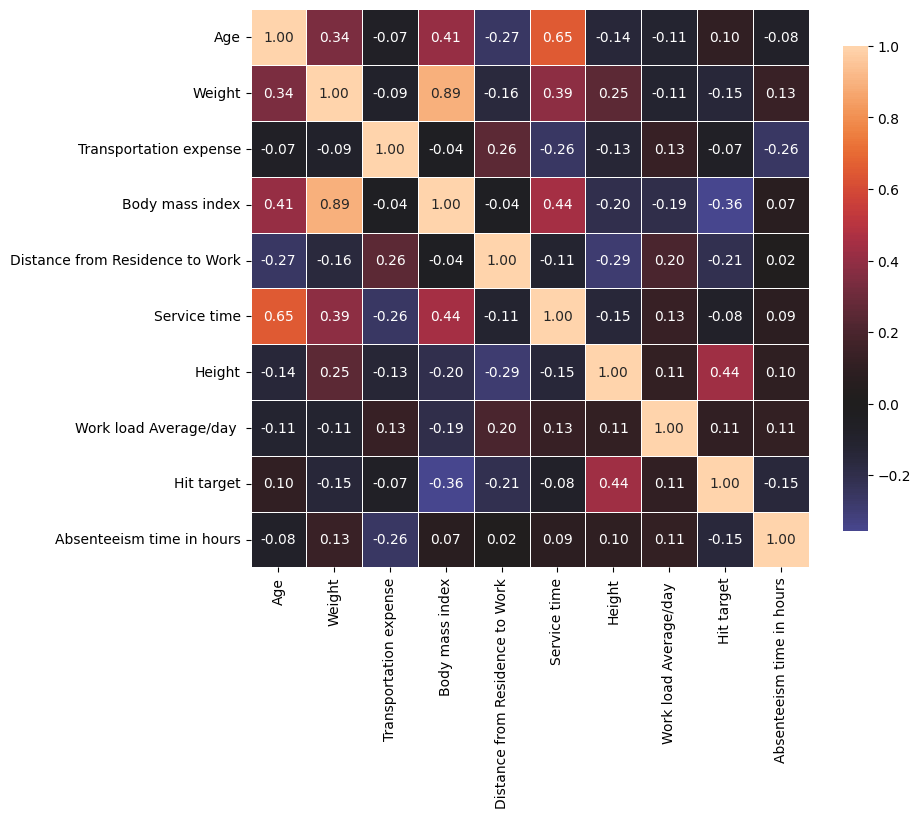

In [19]:
def correlation_heatmap(li):
    correlations = li.corr()

    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(final_data[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target','Absenteeism time in hours']])

In [20]:
corr_with_target = allabsents.corr()['Absenteeism time in hours'].sort_values(ascending=False)
corr_with_target

Absenteeism time in hours          1.000000
Height                             0.147385
Son                                0.127683
Age                                0.086038
Social drinker                     0.073874
Transportation expense             0.040808
Month of absence                   0.033875
Work load Average/day              0.030206
Weight                             0.028674
Service time                       0.019654
Seasons                            0.012429
Hit target                         0.009171
Social smoker                      0.005242
ID                                -0.017577
Pet                               -0.022864
Body mass index                   -0.039468
Education                         -0.056083
Distance from Residence to Work   -0.099886
Day of the week                   -0.130839
Reason for absence                -0.300813
Name: Absenteeism time in hours, dtype: float64

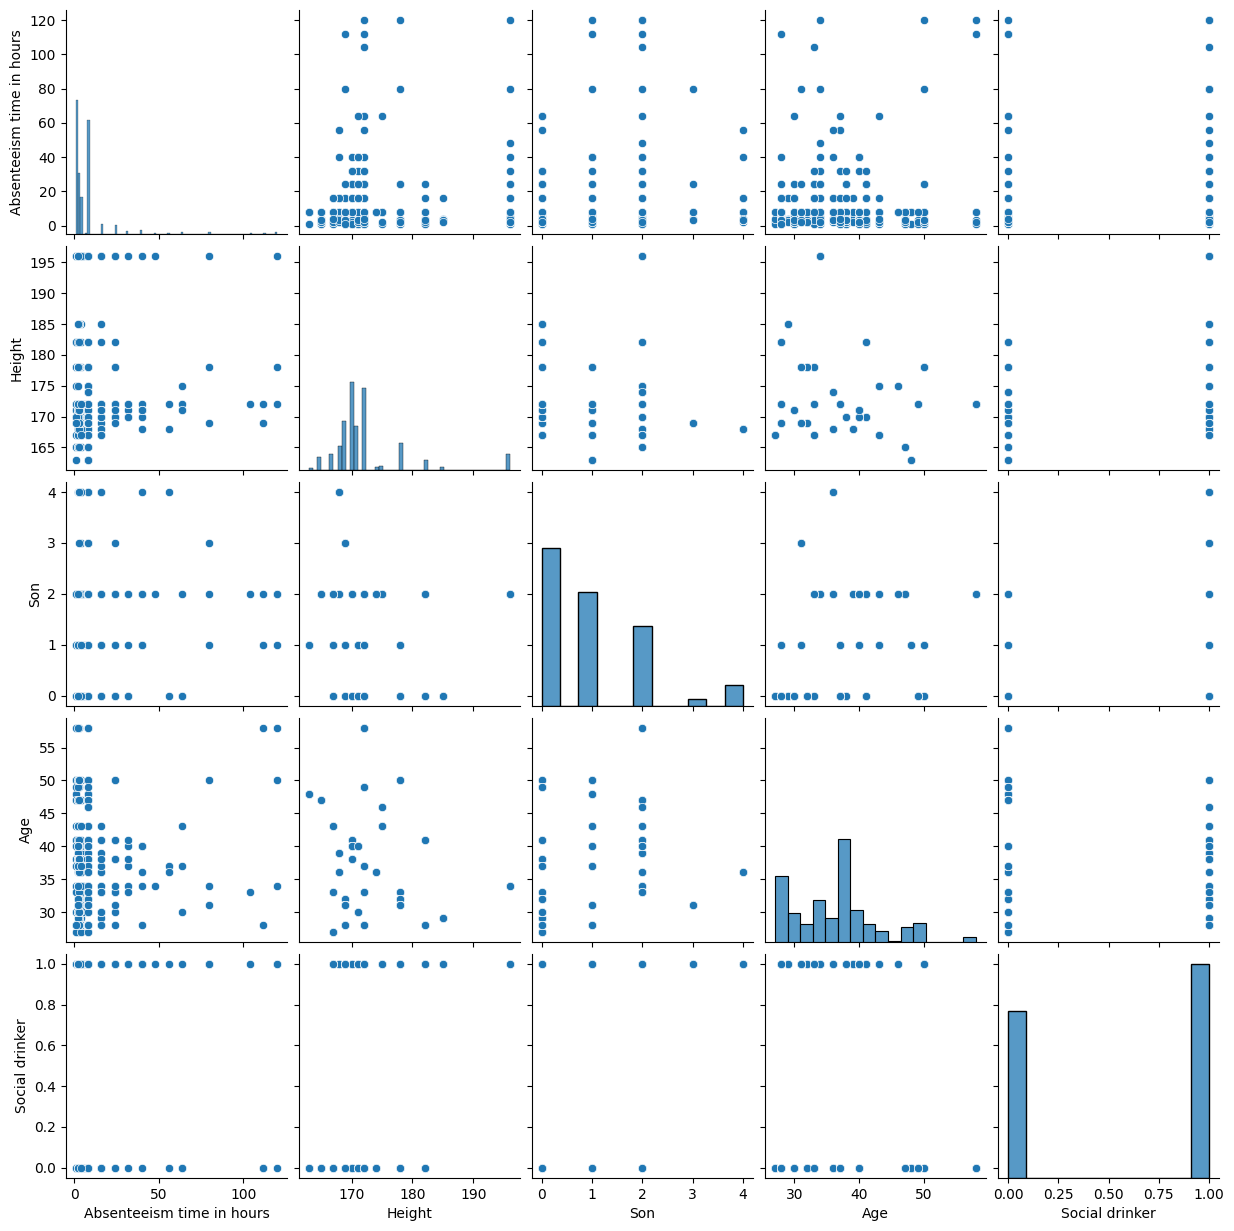

In [21]:
top_features = corr_with_target.index[:5]
sns.pairplot(allabsents[top_features])
plt.show()

# PCA 

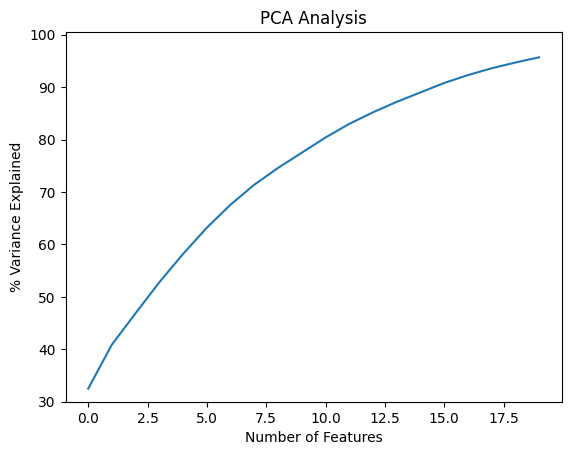

In [22]:
d=StandardScaler().fit_transform(final_data)
rt = PCA(n_components=20)
covar_matrix=rt.fit_transform(d)
var=np.cumsum(np.round(rt.explained_variance_ratio_, decimals=3)*100) #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

It looks like we would need 20 principal components out of 62 columns to explain 95% of the explained variance.

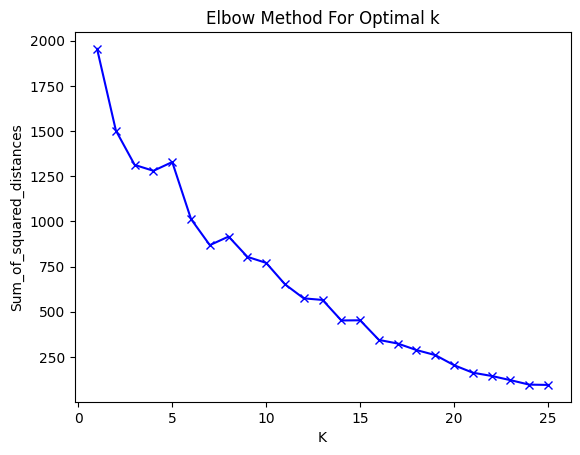

In [23]:
#PCA
pca_reducer=PCA(n_components=20)
reduced_data=pca_reducer.fit_transform(d)
Sum_of_squared_distances = []
K = range(1,26)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(reduced_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From this above result, we would need to use between 15 to 20 clusters. Since we only have 33 customer IDs, we can see how the clustering method will not be able to find distinct groups employees. 

* For the rest of the project,we will assume there are 740 unique ID's instead of 33. 

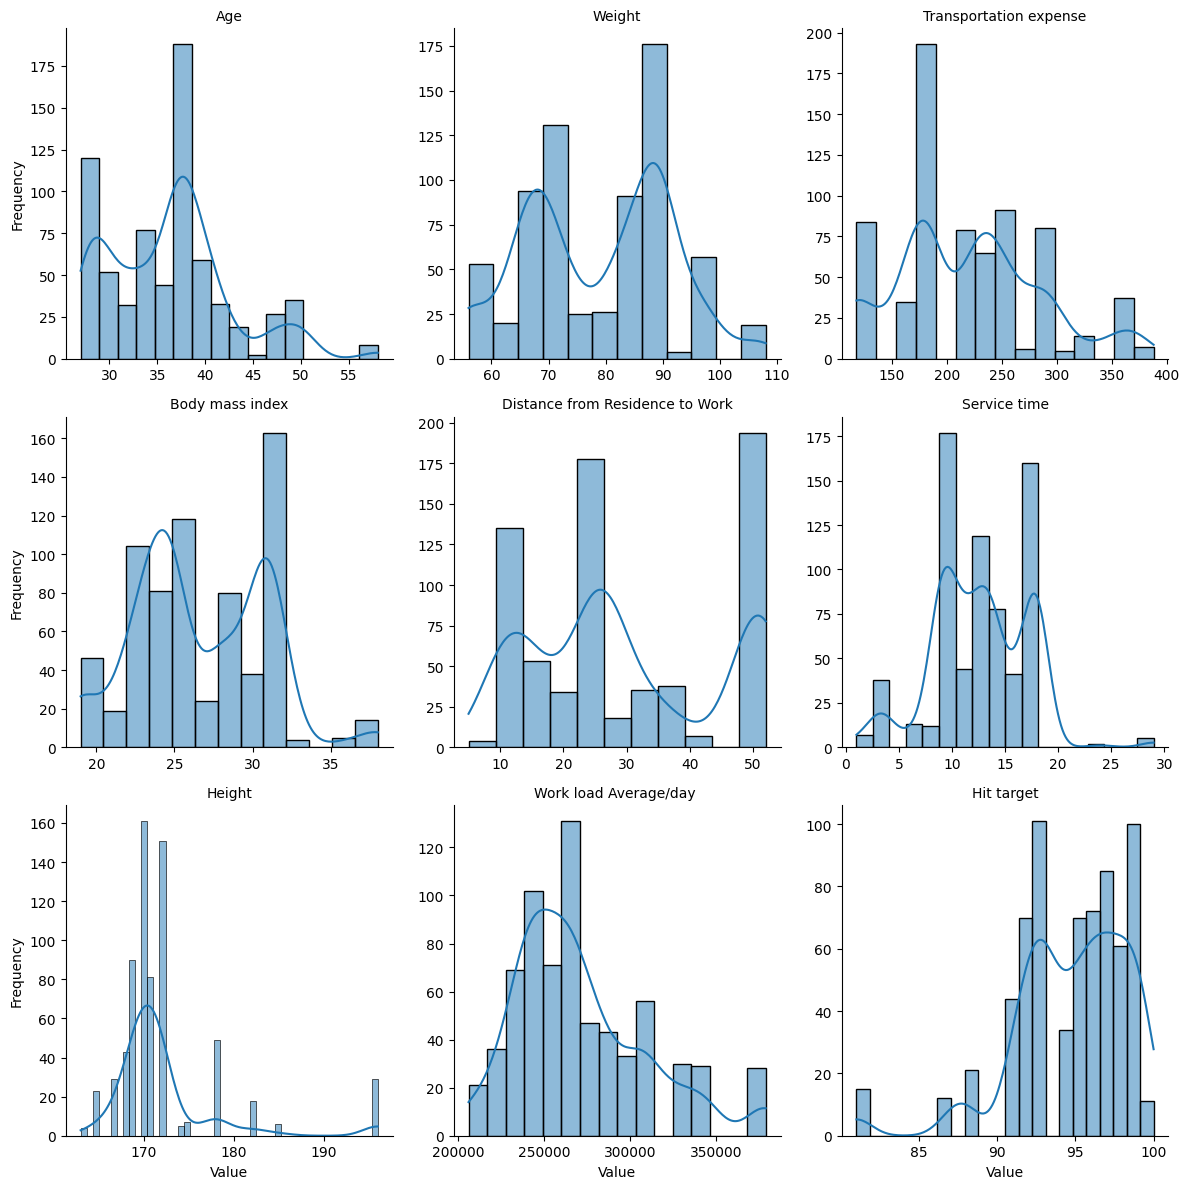

In [24]:
# List of columns to plot
col = ['Age', 'Weight', 'Transportation expense', 'Body mass index', 
       'Distance from Residence to Work', 'Service time', 'Height', 
       'Work load Average/day ', 'Hit target']

# Convert data to long format
data = allabsents[col].melt(var_name="Feature", value_name="Value")

# Use Seaborn's FacetGrid
g = sns.FacetGrid(data, col="Feature", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "Value", kde=True)

# Add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")
plt.tight_layout()
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



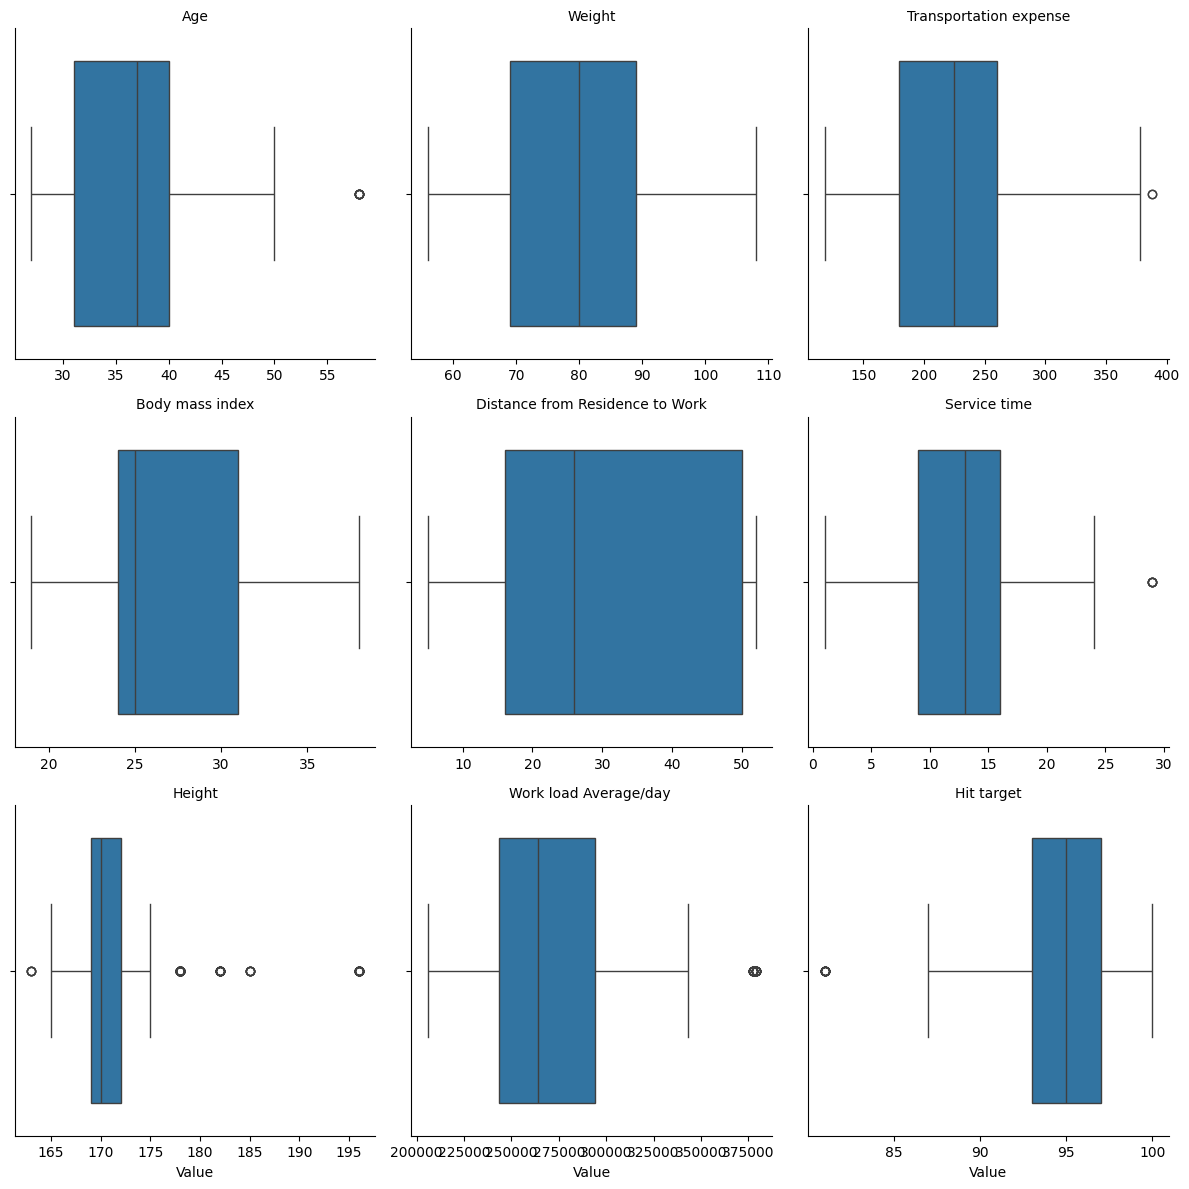

In [25]:
# Transform data to long format
data = allabsents[col].melt(var_name="Feature", value_name="Value")

# Create a FacetGrid for boxplots
g = sns.FacetGrid(data, col="Feature", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.boxplot, "Value", orient="h")

# Customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("Value", "")
plt.tight_layout()
plt.show()

<Axes: xlabel='Absenteeism time in hours', ylabel='count'>

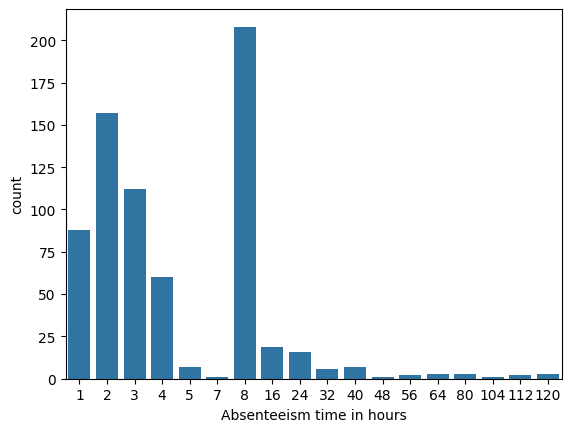

In [26]:
sns.countplot(x='Absenteeism time in hours',data=allabsents)

After that, a statistical focus looks at the dynamics of employees according to Age, Service time and Absenteeism time in hours
​
* Most workers are in between their late 20's and early 40's. On top of that, most employees have between 10 to 18 years of service time.
​
It is worth noticing a few characteristics of the Absenteeism time in hours column: 

    * The plot is more skewed to the right where most values are less than 80 hrs of absence. In fact, **61% of employees have been absent for less than 8hrs** and **29% of them absent for exactly 8hrs**. Hence **91% of Absenteeism time in hours is explained by ony 8 or less hours of absenteeism**.
    * Because of its specific values that are clearly not continuous, we deduce that these are categorical values meaning that we will be using classification for modelling 